In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
dataset_path = "aus_real_estate.csv"
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(data.head())

# Display basic information about the dataset
print("\nDataset Info:")
data.info()

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

Dataset Preview:
     Price  Bedrooms  Bathrooms  SqFt       City State  Year_Built       Type  \
0   982112         4          1  1561   Adelaide   QLD        2021  Townhouse   
1   571388         3          2  3735  Melbourne   VIC        1999      House   
2   866821         5          1  2032     Sydney   VIC        1976  Townhouse   
3  1230977         4          3  3861   Brisbane    SA        1978      House   
4   241787         4          2  3150      Perth    SA        1992  Apartment   

   Garage  Lot_Area  
0       0      1357  
1       1      8397  
2       0      3478  
3       0      7619  
4       0      8324  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       5000 non-null   int64 
 1   Bedrooms    5000 non-null   int64 
 2   Bathrooms   5000 non-null   int64 
 3   SqFt        5000 non-null   int64 
 4

In [21]:
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
print(duplicates)

Number of duplicate rows: 0
Empty DataFrame
Columns: [Price, Bedrooms, Bathrooms, SqFt, City, State, Year_Built, Type, Garage, Lot_Area]
Index: []


In [22]:
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0



Missing Values After Cleaning:
Price         0
Bedrooms      0
Bathrooms     0
SqFt          0
City          0
State         0
Year_Built    0
Type          0
Garage        0
Lot_Area      0
dtype: int64


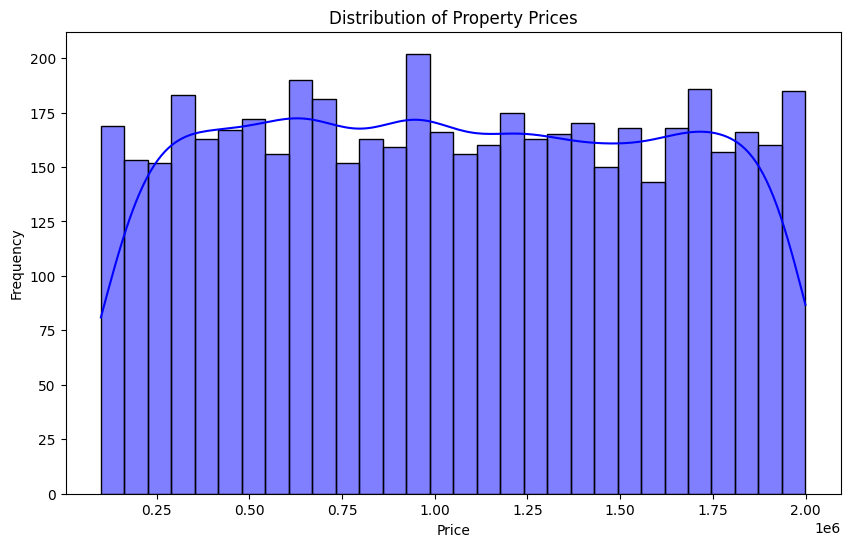

/var/folders/df/npmhf4fs0qb8cnwm2kmptxk00000gn/T/ipykernel_19975/2114238189.py:24: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


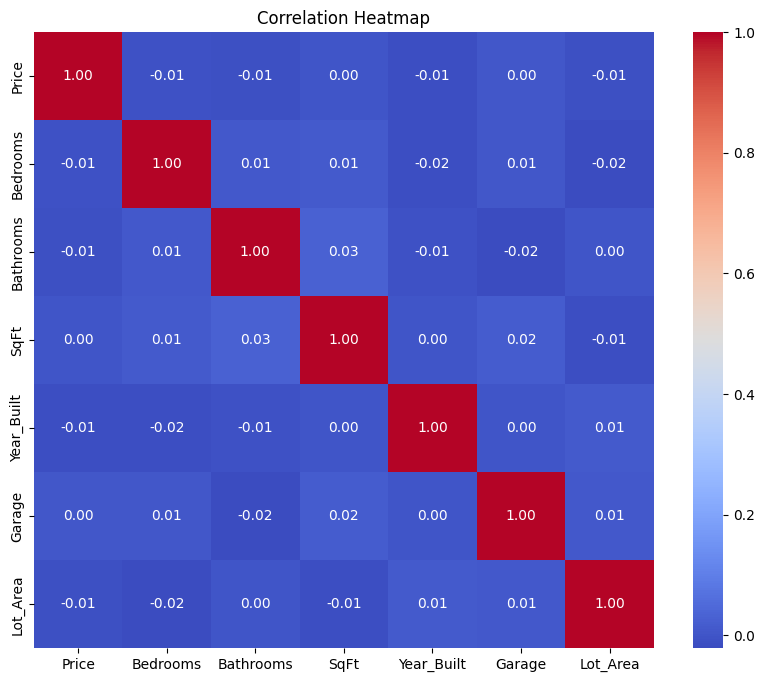

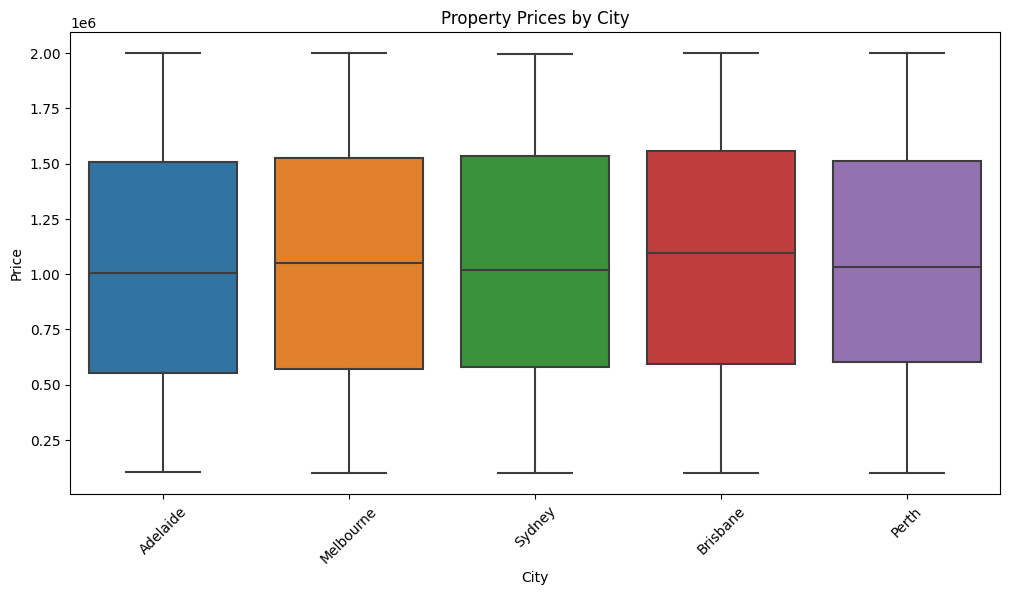

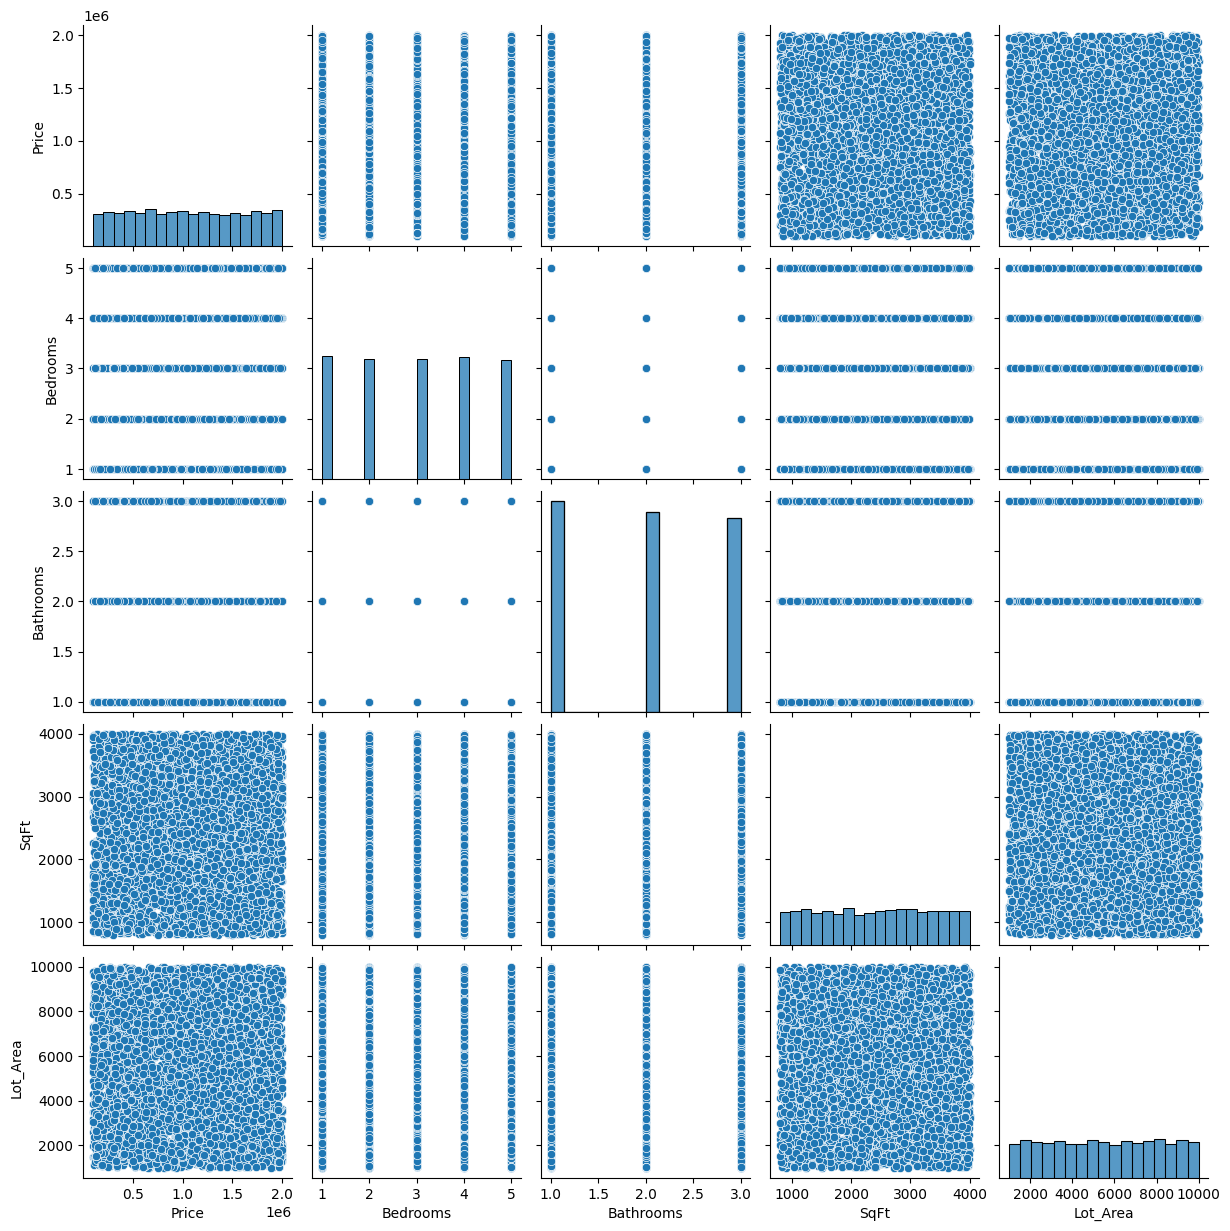

Cleaned dataset saved to cleaned_aus_real_estate.csv


In [23]:
# Handling missing values (if any)
# For simplicity, we'll fill numerical columns with the median and categorical columns with the mode
numerical_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.median()))
data[categorical_columns] = data[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

# Verify missing values are handled
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())

# Exploratory Data Analysis (EDA)
# Distribution of property prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Prices by City
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Price', data=data)
plt.title('Property Prices by City')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Pairplot of key numerical features
key_features = ['Price', 'Bedrooms', 'Bathrooms', 'SqFt', 'Lot_Area']
sns.pairplot(data[key_features])
plt.show()

# Save the cleaned dataset
cleaned_dataset_path = "cleaned_aus_real_estate.csv"
data.to_csv(cleaned_dataset_path, index=False)
print(f"Cleaned dataset saved to {cleaned_dataset_path}")

In [24]:
# Average, mean, median, and mode pricing in each city
city_pricing_stats = data.groupby('City')['Price'].agg(['mean', 'median', lambda x: x.mode()[0]])
city_pricing_stats.columns = ['Mean Price', 'Median Price', 'Mode Price']
print("\nAverage, Median, and Mode Pricing in Each City:")
print(city_pricing_stats)


Average, Median, and Mode Pricing in Each City:
             Mean Price  Median Price  Mode Price
City                                             
Adelaide   1.030948e+06     1004408.0      317606
Brisbane   1.072042e+06     1093553.0      101894
Melbourne  1.044796e+06     1047824.0      100564
Perth      1.051592e+06     1032945.0      958829
Sydney     1.051203e+06     1020377.0      388721



Model Evaluation:
Mean Absolute Error (MAE): 483919.73134
Mean Squared Error (MSE): 318208721635.6029
Root Mean Squared Error (RMSE): 564099.9216766502
R-squared (R2): -0.09297311750399051


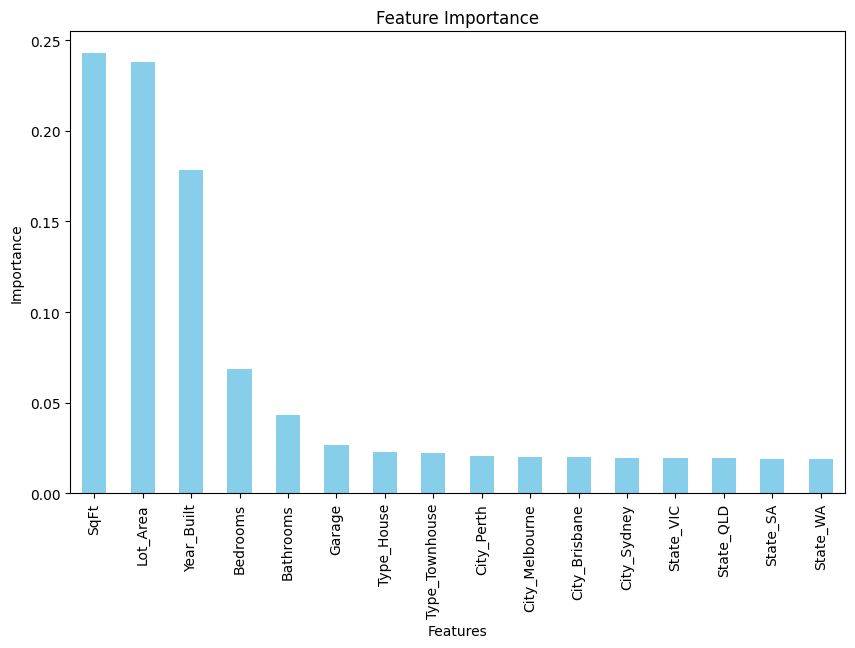

In [25]:
# Prediction Section
# Encoding categorical variables
data = pd.get_dummies(data, columns=['City', 'State', 'Type'], drop_first=True)

# Features and target
X = data.drop(columns=['Price'])
y = data['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

In [26]:
#Hyper Tuning

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Linear Regression R2:", r2_score(y_test, lr_pred))

# Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print("Gradient Boosting R2:", r2_score(y_test, gbr_pred))

Linear Regression R2: -0.0020582153581965024
Gradient Boosting R2: -0.0192988818208204


 98%|===================| 978/1000 [00:31<00:00]        

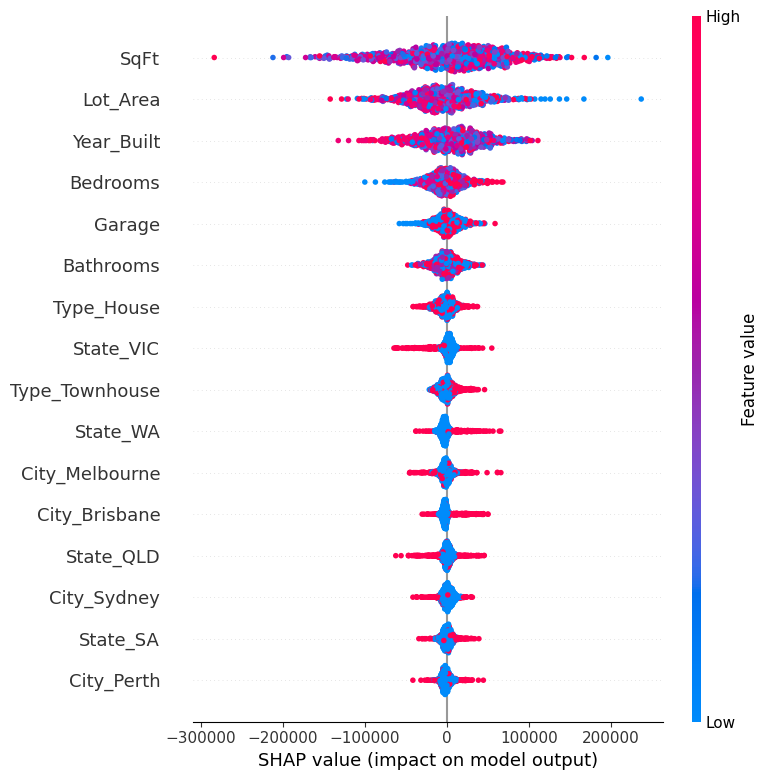

In [29]:
import shap
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

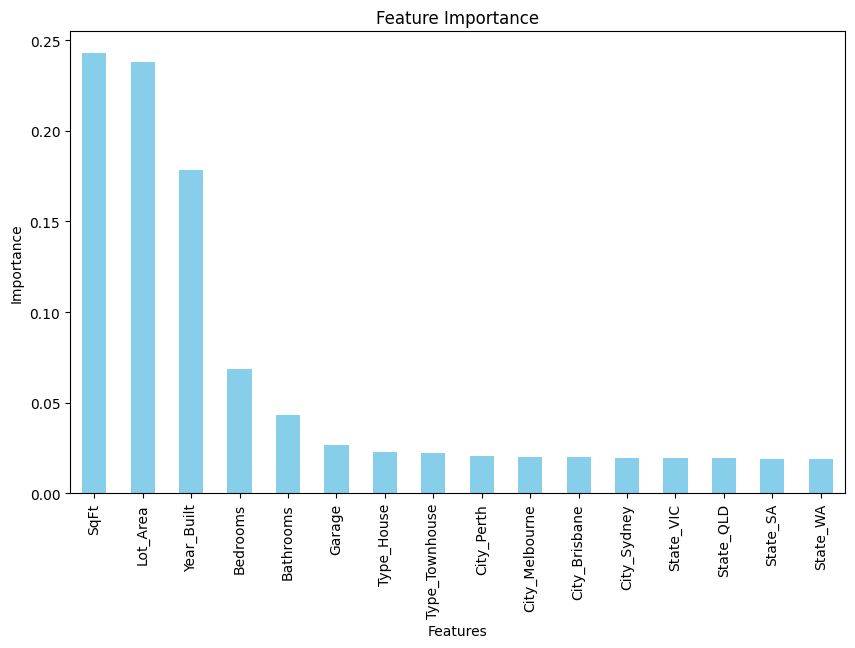

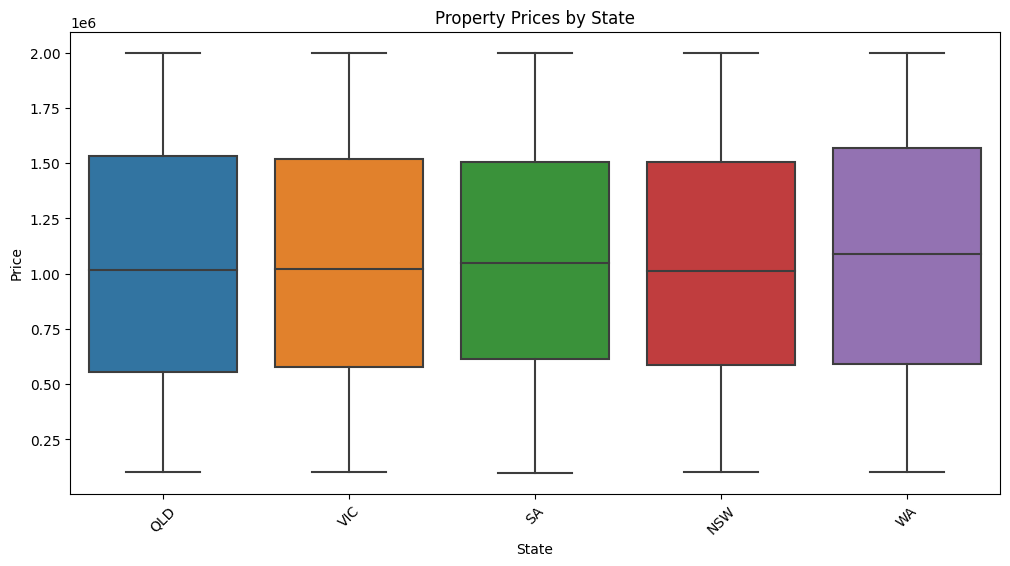

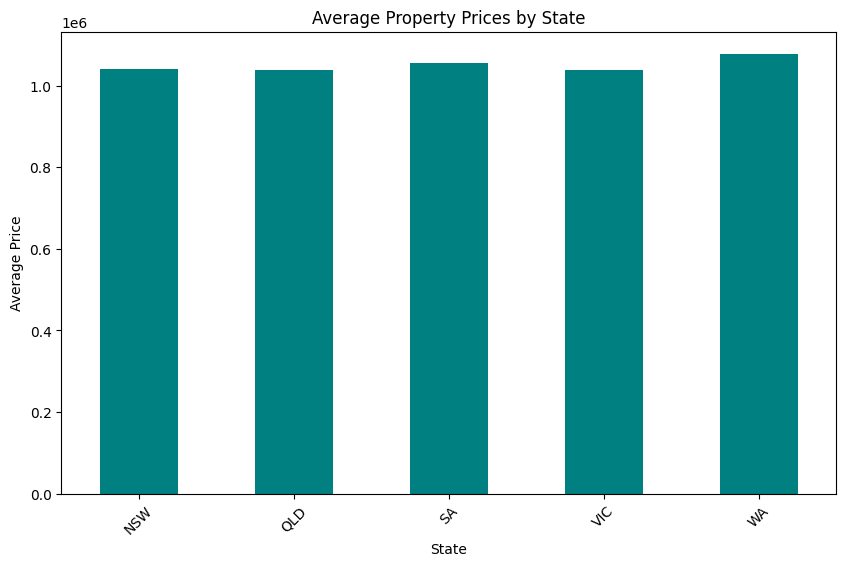

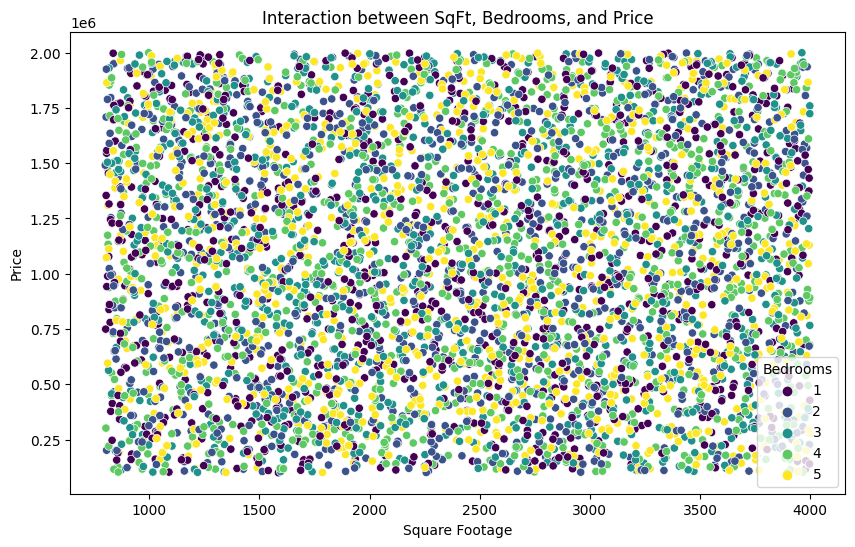

In [30]:
# Geographic Analysis: Price trends by state
original_data = pd.read_csv(dataset_path)
plt.figure(figsize=(12, 6))
sns.boxplot(x='State', y='Price', data=original_data)
plt.title('Property Prices by State')
plt.xlabel('State')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Geographic Analysis: Average price per state
state_avg_price = original_data.groupby('State')['Price'].mean()
plt.figure(figsize=(10, 6))
state_avg_price.plot(kind='bar', color='teal')
plt.title('Average Property Prices by State')
plt.xlabel('State')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Feature Interaction: SqFt and Bedrooms vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SqFt', y='Price', hue='Bedrooms', palette='viridis', data=original_data)
plt.title('Interaction between SqFt, Bedrooms, and Price')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend(title='Bedrooms')
plt.show()